In [11]:
import os
import docx2txt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import pandas as pd

In [12]:
# set up the NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# define the path to your Word documents
path_to_docs = "C:/Users/hrush/Downloads/Prashant sir question 7 docs-20230417T074201Z-001/Prashant sir question 7 docs"

In [14]:
# read the documents and preprocess the text
docs = []
doc_names = []
for file_name in os.listdir(path_to_docs):
    if file_name.endswith('.docx'):
        doc_text = docx2txt.process(os.path.join(path_to_docs, file_name))
        doc_text = doc_text.lower()
        doc_text = ' '.join([word for word in doc_text.split() if word not in stop_words])
        docs.append(doc_text)
        doc_names.append(file_name)

In [15]:
len(docs)
print(docs)

['n <- 1000 outcomes <- cbind(rep("click",n),rep("click",n),numeric(length=n),numeric(length=n)) colnames(outcomes) <- c("finala","finalb","nclicka","nclickb") (i 1:nrow(outcomes)){ shot<-runif(1,min=0,max=1) #first shot count <- 1 (shot > 1/6) { #chance dying 1/6, every 0 < shot < 1/6 #will considered "death" shot <- runif(1,min=0,max=1) #if dead, shoot count <- count + 1 #and count iterations } #replace "click" "dead" either b ifelse ((count %% 2) > 0, #if count odd number = killed, else: b killed (outcomes[i,1] <- "dead"), #replace "click"s outcomes matrix (outcomes[i,2] <- "dead")) #count insert number clicks player #if count = odd number, (count/2)-1 clicks nclick <- count- 1 #the number clicks always number triggerpulls minus 1 ((nclick %% 2) == 0) {outcomes[i,3:4] <- nclick/2 #if nclick even number, b took (nclick/2) clicks } else { outcomes[i,3] <- nclick/2+0.5 outcomes[i,4] <- nclick/2-0.5} #if nclick odd number, took one click b } outcomes <- as.data.frame(outcomes) table(out

In [16]:
vectorizer = TfidfVectorizer(max_features=100000, max_df=0.5, smooth_idf=True)
X = vectorizer.fit_transform(docs)
print(X)
X.shape

  (0, 106)	0.02858112724260208
  (0, 30)	0.02569868317873884
  (0, 169)	0.020771112504875656
  (0, 149)	0.02858112724260208
  (0, 231)	0.05716225448520416
  (0, 210)	0.02858112724260208
  (0, 175)	0.05716225448520416
  (0, 228)	0.05716225448520416
  (0, 212)	0.02858112724260208
  (0, 24)	0.02858112724260208
  (0, 40)	0.02858112724260208
  (0, 230)	0.09164711808572808
  (0, 124)	0.08574338172780624
  (0, 244)	0.05716225448520416
  (0, 216)	0.02858112724260208
  (0, 145)	0.02858112724260208
  (0, 156)	0.02858112724260208
  (0, 148)	0.02858112724260208
  (0, 122)	0.02858112724260208
  (0, 213)	0.05716225448520416
  (0, 102)	0.02858112724260208
  (0, 75)	0.02858112724260208
  (0, 44)	0.02569868317873884
  (0, 158)	0.02569868317873884
  (0, 225)	0.05716225448520416
  :	:
  (38, 182)	0.27801387363957303
  (38, 96)	0.27801387363957303
  (38, 242)	0.27801387363957303
  (38, 131)	0.23008248874193726
  (38, 10)	0.1913848492237935
  (38, 137)	0.28690692865231543
  (38, 59)	0.1667206444188927
  (3

(40, 249)

In [17]:
# Access the vocabulary
vocabulary = vectorizer.vocabulary_
sorted_voca=sorted(vocabulary.items(),key=lambda x:x[1])
# Print the vocabulary
print("Vocabulary:")
for term, index in sorted_voca:
    print(f"Term: '{term}', Index: {index}")

Vocabulary:
Term: '10', Index: 0
Term: '100', Index: 1
Term: '1000', Index: 2
Term: '100000', Index: 3
Term: '11', Index: 4
Term: '112', Index: 5
Term: '12', Index: 6
Term: '150', Index: 7
Term: '16', Index: 8
Term: '19', Index: 9
Term: '20', Index: 10
Term: '21', Index: 11
Term: '24', Index: 12
Term: '28', Index: 13
Term: '30', Index: 14
Term: '300', Index: 15
Term: '31', Index: 16
Term: '32', Index: 17
Term: '454', Index: 18
Term: '4586', Index: 19
Term: '48', Index: 20
Term: '50', Index: 21
Term: '500', Index: 22
Term: '5000', Index: 23
Term: '60', Index: 24
Term: '656', Index: 25
Term: '66', Index: 26
Term: '68', Index: 27
Term: '700', Index: 28
Term: '76', Index: 29
Term: '80', Index: 30
Term: '83', Index: 31
Term: '838', Index: 32
Term: '900', Index: 33
Term: '920', Index: 34
Term: '94658', Index: 35
Term: '964', Index: 36
Term: 'actually', Index: 37
Term: 'adding', Index: 38
Term: 'allowed', Index: 39
Term: 'already', Index: 40
Term: 'always', Index: 41
Term: 'and', Index: 42
Te

In [18]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, init='random', max_iter=100, n_init=10,random_state=12)
kmeans.fit(X)

KMeans(init='random', max_iter=100, n_clusters=6, random_state=12)

In [19]:
# print out the document names in each cluster
for i in range(num_clusters):
    cluster_docs = [doc_names[j] for j in range(len(doc_names)) if kmeans.labels_[j] == i]
    print(f'Cluster {i+1}: {", ".join(cluster_docs)}')

Cluster 1: A003.docx, A006.docx, A020.docx, A035.docx
Cluster 2: A011.docx, A014.docx, A016.docx, A032.docx
Cluster 3: A028.docx, A040.docx, A046.docx, A048.docx
Cluster 4: A005.docx, A025.docx, A026.docx, A033.docx, A034.docx, A036.docx, A037.docx, A043.docx
Cluster 5: A007.docx, A008.docx, A010.docx, A012.docx, A015.docx, A018.docx, A029.docx, A041.docx, A045.docx, A051.docx
Cluster 6: A001.docx, A004.docx, A021.docx, A023.docx, A027.docx, A030.docx, A031.docx, A038.docx, A039.docx, A049.docx


C:\Users\hrush\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hrush\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.010s...
[t-SNE] Computed neighbors for 40 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 0.770388
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.715912
[t-SNE] KL divergence after 1000 iterations: 0.320218


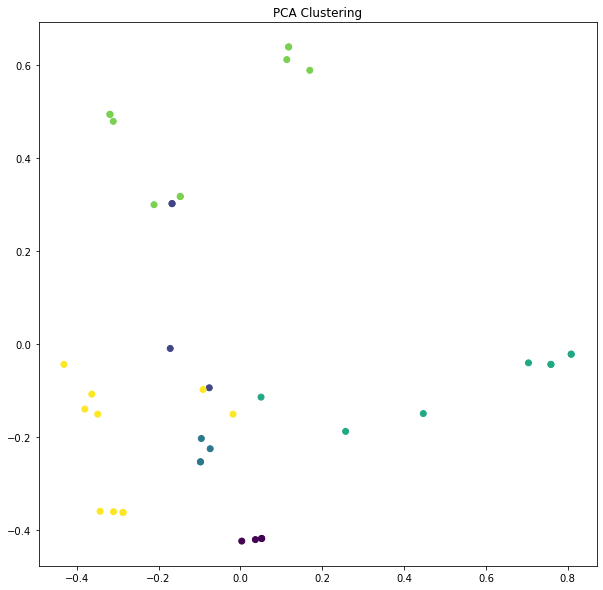

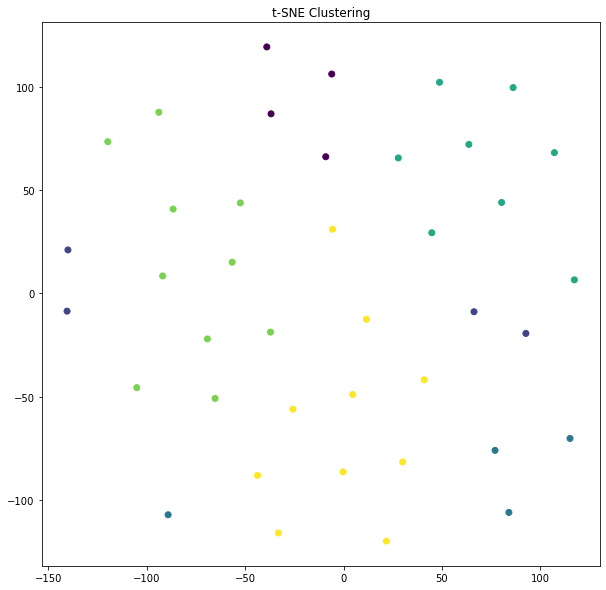

In [20]:
# visualize the clusters using PCA and t-SNE
pca = PCA(n_components=2).fit(X.toarray())
data2D = pca.transform(X.toarray())

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, verbose=1).fit_transform(X.toarray())

plt.figure(figsize=(10, 10))
plt.scatter(data2D[:, 0], data2D[:, 1], c=kmeans.labels_)
plt.title('PCA Clustering')
plt.show()

plt.figure(figsize=(10, 10))
plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans.labels_)
plt.title('t-SNE Clustering')
plt.show()

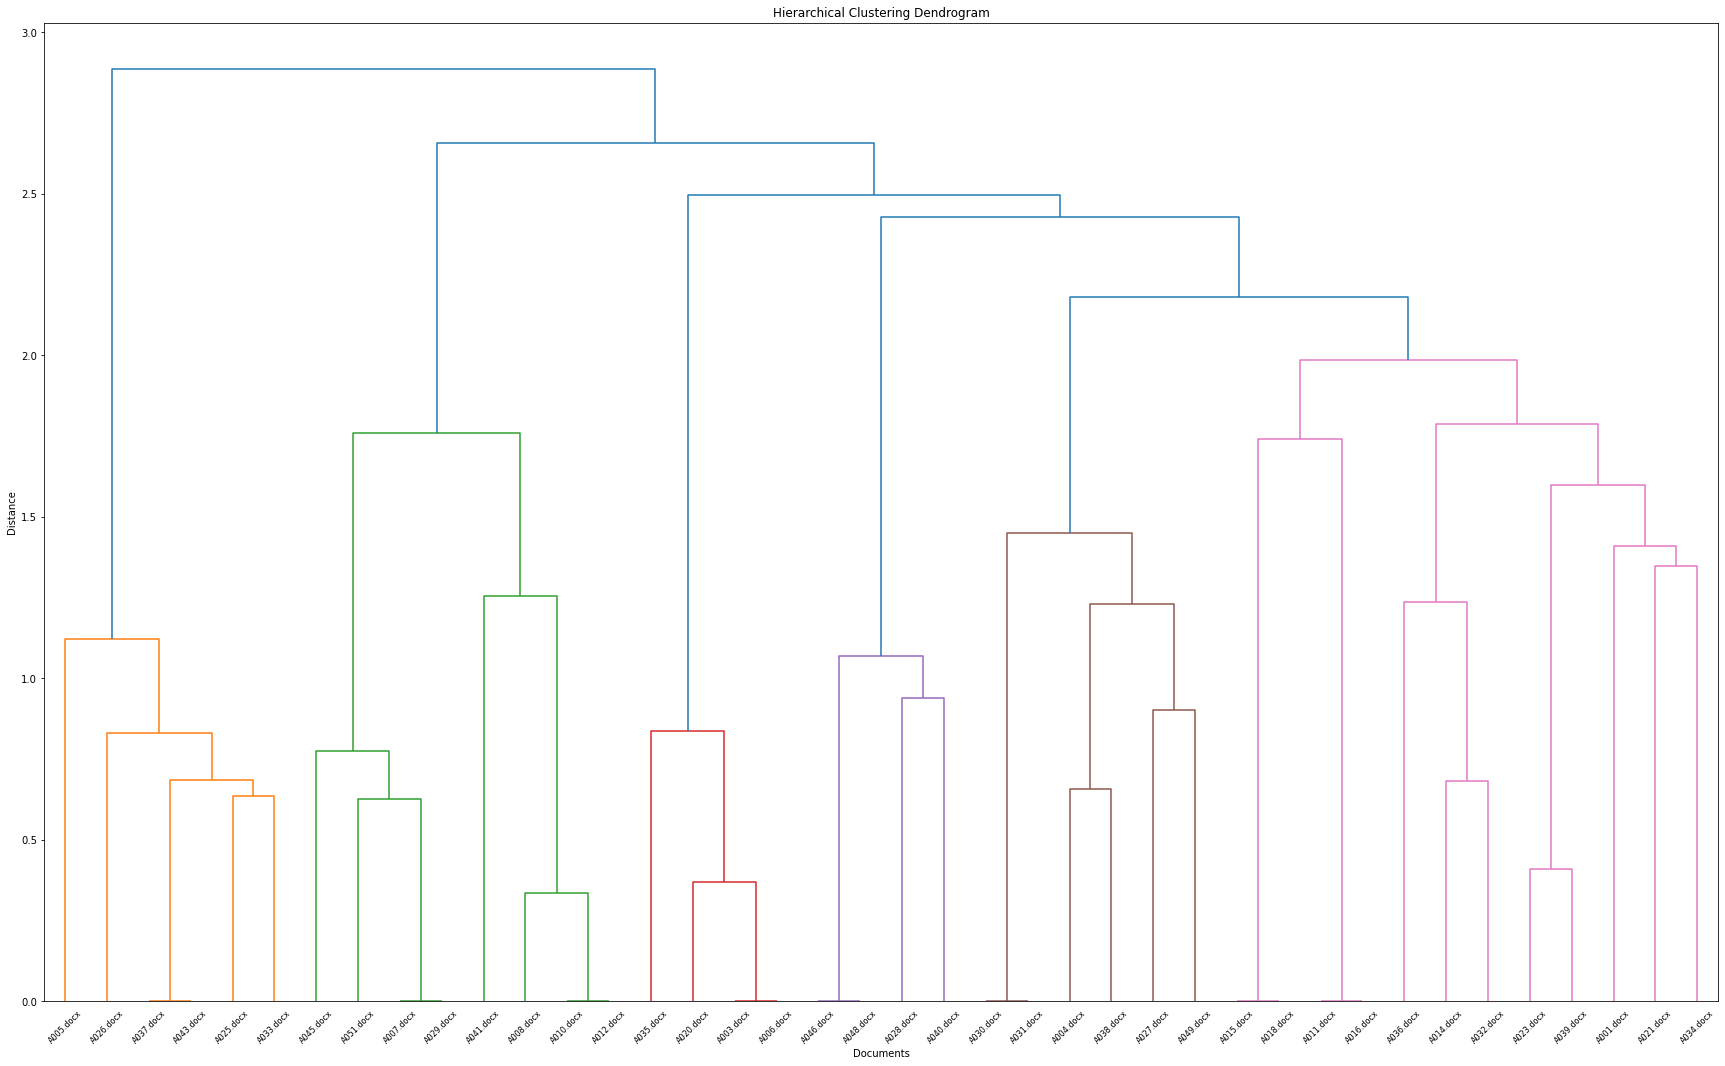

<Figure size 432x288 with 0 Axes>

In [21]:
Z = linkage(X.todense(), method='ward')
fig, ax = plt.subplots(figsize=(30, 18))
dendrogram(Z, labels=doc_names)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()
plt.savefig('C:/Hrushi/M.Sc SEM 2/Project/Offline Results/dendrogram.pdf')

In [12]:
cosine_similarity_matrix = cosine_similarity(X)

# create a dictionary to store the similarity scores for each document pair
similarity_scores = {}
for i in range(len(docs)):
    for j in range(i+1, len(docs)):
        similarity_scores[(doc_names[i], doc_names[j])] = cosine_similarity_matrix[i, j]

# sort the similarity scores in descending order
sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

# print the sorted similarity scores
for pair, score in sorted_scores:
    doc1, doc2 = pair
    percent_similarity = round(score * 100, 2)
    print(f"Similarity between {doc1} and {doc2}: {percent_similarity}%")

Similarity between A003.docx and Ritvik.docx: 100.0%
Similarity between A010.docx and A012.docx: 100.0%
Similarity between A007.docx and A029.docx: 100.0%
Similarity between A011.docx and A016.docx: 100.0%
Similarity between A030.docx and A031.docx: 100.0%
Similarity between A037.docx and A043.docx: 100.0%
Similarity between A015.docx and A018.docx: 100.0%
Similarity between A046.docx and A048.docx: 100.0%
Similarity between A008.docx and A010.docx: 95.79%
Similarity between A008.docx and A012.docx: 95.79%
Similarity between A003.docx and A020.docx: 94.87%
Similarity between A020.docx and Ritvik.docx: 94.87%
Similarity between A023.docx and A039.docx: 91.56%
Similarity between A007.docx and A051.docx: 85.29%
Similarity between A029.docx and A051.docx: 85.29%
Similarity between A025.docx and A037.docx: 83.17%
Similarity between A025.docx and A043.docx: 83.17%
Similarity between A033.docx and A037.docx: 83.17%
Similarity between A033.docx and A043.docx: 83.17%
Similarity between A025.doc

In [13]:
df = pd.DataFrame(sorted_scores, columns=['Document Pair', 'Similarity Score'])

# add columns for individual document names and similarity percentages
df[['Document 1', 'Document 2']] = pd.DataFrame(df['Document Pair'].tolist(), index=df.index)
df['Similarity Percentage'] = round(df['Similarity Score'] * 100, 2)

# drop the 'Document Pair' column
df = df.drop(columns=['Document Pair'])

# print the dataframe
print(df)

     Similarity Score Document 1   Document 2  Similarity Percentage
0                 1.0  A003.docx  Ritvik.docx                  100.0
1                 1.0  A010.docx    A012.docx                  100.0
2                 1.0  A007.docx    A029.docx                  100.0
3                 1.0  A011.docx    A016.docx                  100.0
4                 1.0  A030.docx    A031.docx                  100.0
..                ...        ...          ...                    ...
775               0.0  A043.docx    A049.docx                    0.0
776               0.0  A045.docx    A046.docx                    0.0
777               0.0  A045.docx    A048.docx                    0.0
778               0.0  A046.docx    A051.docx                    0.0
779               0.0  A048.docx    A051.docx                    0.0

[780 rows x 4 columns]


In [14]:
df.to_csv('C:/Hrushi/M.Sc SEM 2/Project/Offline Results/similarity_scores.csv', index=False)

In [15]:
labels = kmeans.labels_

# compute the cluster centroids
centroids = kmeans.cluster_centers_

In [16]:
for cluster in range(num_clusters):
    indices = [i for i, x in enumerate(labels) if x == cluster]
    cluster_docs = [docs[i] for i in indices]
    cluster_names = [doc_names[i] for i in indices]
    cluster_X = vectorizer.transform(cluster_docs)
    similarity_matrix = cosine_similarity(cluster_X)
    print(f"Cluster {cluster}:")
    for i in range(len(cluster_docs)):
        for j in range(i+1, len(cluster_docs)):
            similarity_score = similarity_matrix[i, j]
            doc1_name = cluster_names[i]
            doc2_name = cluster_names[j]
            similarity_percentage = similarity_score * 100
            print(f"Cosine similarity between '{doc1_name}' and '{doc2_name}': {similarity_percentage:.2f}%")

Cluster 0:
Cosine similarity between 'A001.docx' and 'A004.docx': 3.29%
Cosine similarity between 'A001.docx' and 'A021.docx': 3.51%
Cosine similarity between 'A001.docx' and 'A023.docx': 3.95%
Cosine similarity between 'A001.docx' and 'A027.docx': 1.86%
Cosine similarity between 'A001.docx' and 'A030.docx': 2.42%
Cosine similarity between 'A001.docx' and 'A031.docx': 2.42%
Cosine similarity between 'A001.docx' and 'A038.docx': 3.39%
Cosine similarity between 'A001.docx' and 'A039.docx': 4.09%
Cosine similarity between 'A001.docx' and 'A049.docx': 2.00%
Cosine similarity between 'A004.docx' and 'A021.docx': 10.97%
Cosine similarity between 'A004.docx' and 'A023.docx': 35.81%
Cosine similarity between 'A004.docx' and 'A027.docx': 52.40%
Cosine similarity between 'A004.docx' and 'A030.docx': 55.87%
Cosine similarity between 'A004.docx' and 'A031.docx': 55.87%
Cosine similarity between 'A004.docx' and 'A038.docx': 78.36%
Cosine similarity between 'A004.docx' and 'A039.docx': 37.08%
Cosine

In [17]:
similarity_scores = {}
for cluster in range(num_clusters):
    indices = [i for i, x in enumerate(labels) if x == cluster]
    cluster_docs = [docs[i] for i in indices]
    cluster_names = [doc_names[i] for i in indices]
    cluster_X = vectorizer.transform(cluster_docs)
    similarity_matrix = cosine_similarity(cluster_X)
    cluster_similarity_scores = []
    for i in range(len(cluster_docs)):
        for j in range(i+1, len(cluster_docs)):
            similarity_score = similarity_matrix[i, j]
            doc1_name = cluster_names[i]
            doc2_name = cluster_names[j]
            similarity_percentage = similarity_score * 100
            if similarity_percentage > 85:
                cluster_similarity_scores.append((doc1_name, doc2_name, similarity_percentage))
    similarity_scores[f"Cluster {cluster}"] = cluster_similarity_scores
for cluster, scores in similarity_scores.items():
    print(f"\n{cluster}:")
    if scores:
        for score in scores:
            print(f"Cosine similarity between '{score[0]}' and '{score[1]}': {score[2]:.2f}%")
    else:
        print("No similar documents found in this cluster.")


Cluster 0:
Cosine similarity between 'A023.docx' and 'A039.docx': 91.56%
Cosine similarity between 'A030.docx' and 'A031.docx': 100.00%

Cluster 1:
Cosine similarity between 'A037.docx' and 'A043.docx': 100.00%

Cluster 2:
Cosine similarity between 'A003.docx' and 'A020.docx': 94.87%
Cosine similarity between 'A003.docx' and 'Ritvik.docx': 100.00%
Cosine similarity between 'A020.docx' and 'Ritvik.docx': 94.87%

Cluster 3:
Cosine similarity between 'A007.docx' and 'A029.docx': 100.00%
Cosine similarity between 'A007.docx' and 'A051.docx': 85.29%
Cosine similarity between 'A008.docx' and 'A010.docx': 95.79%
Cosine similarity between 'A008.docx' and 'A012.docx': 95.79%
Cosine similarity between 'A010.docx' and 'A012.docx': 100.00%
Cosine similarity between 'A015.docx' and 'A018.docx': 100.00%
Cosine similarity between 'A029.docx' and 'A051.docx': 85.29%

Cluster 4:
Cosine similarity between 'A046.docx' and 'A048.docx': 100.00%

Cluster 5:
Cosine similarity between 'A011.docx' and 'A016.d

In [20]:
df_clus = pd.DataFrame.from_dict({(i,j): similarity_scores[i][j] 
                             for i in similarity_scores.keys() 
                             for j in range(len(similarity_scores[i]))},
                            orient='index',
                            columns=['Doc1', 'Doc2', 'Similarity(%)'])

df_clus.index.names = ['Cluster,pair no.',]
df_clus.reset_index(inplace=True)
print(df_clus)

   Cluster,pair no.       Doc1         Doc2  Similarity(%)
0    (Cluster 0, 0)  A023.docx    A039.docx      91.560683
1    (Cluster 0, 1)  A030.docx    A031.docx     100.000000
2    (Cluster 1, 0)  A037.docx    A043.docx     100.000000
3    (Cluster 2, 0)  A003.docx    A020.docx      94.865339
4    (Cluster 2, 1)  A003.docx  Ritvik.docx     100.000000
5    (Cluster 2, 2)  A020.docx  Ritvik.docx      94.865339
6    (Cluster 3, 0)  A007.docx    A029.docx     100.000000
7    (Cluster 3, 1)  A007.docx    A051.docx      85.285858
8    (Cluster 3, 2)  A008.docx    A010.docx      95.794102
9    (Cluster 3, 3)  A008.docx    A012.docx      95.794102
10   (Cluster 3, 4)  A010.docx    A012.docx     100.000000
11   (Cluster 3, 5)  A015.docx    A018.docx     100.000000
12   (Cluster 3, 6)  A029.docx    A051.docx      85.285858
13   (Cluster 4, 0)  A046.docx    A048.docx     100.000000
14   (Cluster 5, 0)  A011.docx    A016.docx     100.000000


In [22]:
df_clus.to_csv('C:/Hrushi/M.Sc SEM 2/Project/Offline Results/cluster_similarity_scores.csv', index=False)

In [24]:
from scipy.spatial.distance import pdist, squareform

# compute pairwise distances between documents
distances = pdist(X.toarray(), metric='euclidean')

# convert the pairwise distances to a square distance matrix
distance_matrix = squareform(distances)

# print the distance matrix
print(distance_matrix)


[[0.         1.40173139 1.39073832 ... 1.39997086 1.41421356 1.40173139]
 [1.40173139 0.         1.33142553 ... 1.38057557 1.33629707 0.        ]
 [1.39073832 1.33142553 0.         ... 0.9992963  1.41421356 1.33142553]
 ...
 [1.39997086 1.38057557 0.9992963  ... 0.         1.35551044 1.38057557]
 [1.41421356 1.33629707 1.41421356 ... 1.35551044 0.         1.33629707]
 [1.40173139 0.         1.33142553 ... 1.38057557 1.33629707 0.        ]]


In [28]:
distance_matrix.shape

(40, 40)